파이썬 머신러닝 완벽 가이드 ch8. 7, 10 pg. 516 ~ 528, 544 ~ 561

## 07 문서 군집화 소개와 실습 (Opinion Review 데이터 세트)

### 문서 군집화 

- 비슷한 텍스트 구성의 문서를 군집화(Clustering)하는 것

- 비지도학습

### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob, os
path = r'/content/drive/MyDrive/ESAAdata/OpinosisDataset1.0/topics'
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path,"*.data"))
filename_list = []
opinion_text=[]
# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
  # 개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  # 절대 경로로 주어진 파일명을 가공.
  # .data 확장자도 제거
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형을 리스트로 반환
def LemTokens(tokens):
  return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord('문자열') : 문자열의 아스키 코드 반환
# string.puncutaion : 문자열의 모든 구두점이 들어있음
# dict(key, value) 형태로 모든 구두점의 각 아스키 코드를 key값으로 넣음
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
  # 텍스트 소문자 변경 후 특수 문자 제거
  text_new = text.lower().translate(remove_punct_dict)
  # 단어 토큰화
  word_tokens = nltk.word_tokenize(text_new)
  # 단어 원형 추출
  return LemTokens(word_tokens)

In [ ]:
# 문서를 TF-IDF 형태로 피처 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [ ]:
# 문서 군집 분류
from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [ ]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,2
1,battery-life_ipod_nano_8gb,...,2
2,accuracy_garmin_nuvi_255W_gps,...,3
3,bathroom_bestwestern_hotel_sfo,...,0
4,voice_garmin_nuvi_255W_gps,...,3


In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename') # Hotel에 대한 리뷰

,filename,opinion_text,cluster_label
3,bathroom_bestwestern_hotel_sfo,...,0
29,food_holiday_inn_london,...,0
31,food_swissotel_chicago,...,0
16,free_bestwestern_hotel_sfo,...,0
27,location_bestwestern_hotel_sfo,...,0
44,location_holiday_inn_london,...,0
26,parking_bestwestern_hotel_sfo,...,0
7,price_holiday_inn_london,...,0
42,room_holiday_inn_london,...,0
25,rooms_bestwestern_hotel_sfo,...,0


In [ ]:
document_df[document_df['cluster_label']==1].sort_values(by='filename') # 자동차에 대한 리뷰

,filename,opinion_text,cluster_label
32,comfort_honda_accord_2008,...,1
39,comfort_toyota_camry_2007,...,1
13,gas_mileage_toyota_camry_2007,...,1
14,interior_honda_accord_2008,...,1
23,interior_toyota_camry_2007,...,1
17,mileage_honda_accord_2008,...,1
45,performance_honda_accord_2008,...,1
47,quality_toyota_camry_2007,...,1
41,seats_honda_accord_2008,...,1
6,transmission_toyota_camry_2007,...,1


In [ ]:
document_df[document_df['cluster_label']==2].sort_values(by='filename') # 전자기기에 대한 리뷰

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,2
1,battery-life_ipod_nano_8gb,...,2
20,battery-life_netbook_1005ha,...,2
15,keyboard_netbook_1005ha,...,2
35,performance_netbook_1005ha,...,2
38,screen_ipod_nano_8gb,...,2
37,screen_netbook_1005ha,...,2
46,size_asus_netbook_1005ha,...,2
33,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2
8,video_ipod_nano_8gb,...,2


In [ ]:
document_df[document_df['cluster_label']==3].sort_values(by='filename') # 차량용 네비게이션

,filename,opinion_text,cluster_label
2,accuracy_garmin_nuvi_255W_gps,...,3
18,directions_garmin_nuvi_255W_gps,...,3
50,satellite_garmin_nuvi_255W_gps,...,3
34,screen_garmin_nuvi_255W_gps,...,3
40,updates_garmin_nuvi_255W_gps,...,3
4,voice_garmin_nuvi_255W_gps,...,3


In [ ]:
document_df[document_df['cluster_label']==4].sort_values(by='filename') # 킨들

,filename,opinion_text,cluster_label
21,buttons_amazon_kindle,...,4
12,display_garmin_nuvi_255W_gps,...,4
19,eyesight-issues_amazon_kindle,...,4
5,features_windows7,...,4
43,fonts_amazon_kindle,...,4
28,navigation_amazon_kindle,...,4
11,price_amazon_kindle,...,4
49,speed_garmin_nuvi_255W_gps,...,4
36,speed_windows7,...,4


In [ ]:
# 3개의 군집화
from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=3, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 그룹을 cluster_label 칼럼으로 할당하고 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
23,interior_toyota_camry_2007,...,0
47,quality_toyota_camry_2007,...,0
45,performance_honda_accord_2008,...,0
32,comfort_honda_accord_2008,...,0
41,seats_honda_accord_2008,...,0
6,transmission_toyota_camry_2007,...,0
17,mileage_honda_accord_2008,...,0
39,comfort_toyota_camry_2007,...,0
14,interior_honda_accord_2008,...,0
13,gas_mileage_toyota_camry_2007,...,0


### 군집별 핵심 단어 추출하기

In [ ]:
cluster_centers = km_cluster.cluster_centers_
print('cluster centers shape:', cluster_centers.shape)
print(cluster_centers)
# shape 행: 군집 개수, 열: 개별 피처 수
# 개별 군집 내의 상대 위치를 숫자 값으로 표현 (0~1)

cluster centers shape: (3, 4611)
[[0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [ ]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
  cluster_details = {}
  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
  
  # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_feature_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames
  return cluster_details

In [ ]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print("###### Cluster {0}".format(cluster_num))
    print('Top features: ', cluster_detail['top_features'])
    print('Reviews 파일명 :', cluster_detail['filenames'][:7])
    print("================================================")

In [ ]:
feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features:  ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['transmission_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'mileage_honda_accord_2008', 'interior_toyota_camry_2007', 'comfort_honda_accord_2008', 'comfort_toyota_camry_2007']
###### Cluster 1
Top features:  ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'accuracy_garmin_nuvi_255W_gps', 'voice_garmin_nuvi_255W_gps', 'features_windows7', 'video_ipod_nano_8gb', 'price_amazon_kindle']
###### Cluster 2
Top features:  ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'price_holiday_inn_london', 'staff_swissotel_chicago', 'service_holiday_inn_london', 'free_bestwe

## 10 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

In [4]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/drive/MyDrive/ESAAdata/mercaridata/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [5]:
print(mercari_df.info()) # brand_name 칼럼에 Null값이 많음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


- 회귀에서 Target 값의 정규 분포도는 매우 중요함. 왜곡되어 있을 경우 보통 로그를 씌워서 변환하면 대부분 정규 분포의 형태를 가지게 됨.

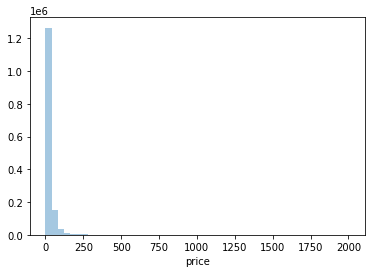

In [6]:
# Target값인 price의 분포
import matplotlib.pyplot as plt
import seaborn as sns

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)
# 적은 가격을 가진 데이터 값에 왜곡돼 분포되어 있음.

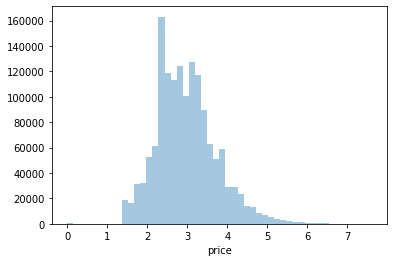

In [7]:
# Price 열에 로그 변환 후 분포
import numpy as np
y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False) # 정규분포에 가까워짐.

In [8]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [9]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts()) # 1은 무료, 0은 유료
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [10]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [11]:
mercari_df['category_name'] # 대분류/중분류/소분류

0                                          Men/Tops/T-shirts
1          Electronics/Computers & Tablets/Components & P...
2                                Women/Tops & Blouses/Blouse
3                         Home/Home Décor/Home Décor Accents
4                                    Women/Jewelry/Necklaces
                                 ...                        
1482530                               Women/Dresses/Mid-Calf
1482531                             Kids/Girls 2T-5T/Dresses
1482532       Sports & Outdoors/Exercise/Fitness accessories
1482533                   Home/Home Décor/Home Décor Accents
1482534                    Women/Women's Accessories/Wallets
Name: category_name, Length: 1482535, dtype: object

In [12]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 변환
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other Null', 'Other Null']

# 위의 split cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :', mercari_df['cat_jung'].nunique()) # nunique(): 고유값들의 수
print('소분류 개수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 : 114
소분류 개수 : 871


In [13]:
# brand_name, category_name, item_description 칼럼의 Null값은 일괄적으로 'Other Null'로 동일하게 변경
mercari_df['brand_name'] = mercari_df['brand_name'].fillna('Ohter_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna('Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna('Other_Null')

# 각 칼럼별로 Null 값 건수 확인
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화

- 상품 가격을 예측해야 하므로 회귀 모델을 기반으로 함. 선형 회귀 모델과 회귀 트리 모델 모두 적용

- 선형 회귀는 원-핫 인코딩을 훨씬 선호

- 피처 벡터화는 비교적 짧은 텍스의 경우 Count 기반의 벡터화를, 긴 텍스트는 TD-IDF 기반의 벡터화를 적용함.

In [14]:
print('brand name의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 :\n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 : 4810
brand name sample 5건 :
 Ohter_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


- brand_name : 원핫인코딩 이용

In [15]:
print('name의 유형 건수 :', mercari_df['name'].nunique())
print('name sample 10건 :\n', mercari_df['name'][:7])

name의 유형 건수 : 1225273
name sample 10건 :
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


- Name 속성의 종류가 매우 많음. 전체 데이터 1,482,535 중 name 속성은 1,225,273가지이므로 거의 고유한 상품명을 가지고 있음.
- Name 속성은 유형이 매우 많고 적은 단어 위주의 텍스트 형태로 되어 있으므로 Count 기반 피처 벡터화 변환 적용

- category_name은 cat_dae, cat_jung, cat_so 칼럼으로 분리됨. 해당 칼럼에 대해 원핫인코딩 적용

- shipping은 0, 1로 2가지 유형의 값을 가지고 있으므로 원핫인코딩 적용

- item_condition_id는 상품 상태로서, 1,2,3,4,5의 5가지 유형의 값을 가지고 있으므로 원핫인코딩 적용

In [16]:
# item_description은 상품에 대한 간단 설명으로 긴 텍스트를 가짐.

pd.set_option('max_colwidth',200)
# item_description의 평균 문자열 길이
print('item_description의 평균 문자열 길이:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description의 평균 문자열 길이: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

- item_description은 평균 문자열 길이가 145자로 크므로 TF-IDF로 변환

In [17]:
# name 속성에 대한 피처 벡터화 변환
cnt_vect = CountVectorizer()
X_name = cnt_vect.fit_transform(mercari_df.name)

# item_desciption에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)
# 피처 벡터화를 통해 희소행렬 반환받음.

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


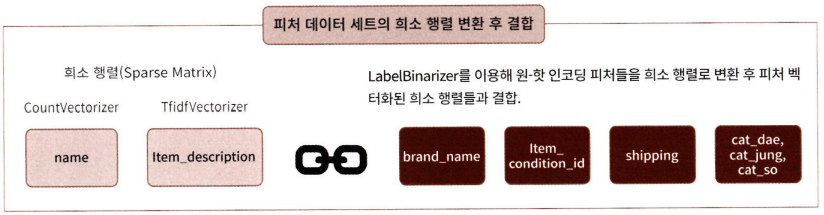

- LabelBinarizer 클래스: 희소 행렬 형태의 원핫 인코딩 변환을 지원함. 생성 시 sparse_out = True로 파라미터를 설정해주면 됨. 

- hstack(): 희소 행렬을 손쉽게 칼럼 레벨로 결합할 수 있게 해줌.

In [18]:
from sklearn.preprocessing import LabelBinarizer
# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원핫인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [19]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))
# 인코딩 변환된 데이터 세트는 CSR 형태로 변환된 csr_matrix 타입

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [20]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


0

### 릿지 회귀 모델 구축 및 평가

In [21]:
# 모델의 예측 성능 평가
def rmsle(y, y_pred):
  # undeflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
  return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
  # 원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  # rmsle로 RMSLE 값 추출
  rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result

In [22]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
  X = hstack(matrix_list).tocsr()

  X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

  # 모델 학습 및 예측
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  del X, X_train, X_test, y_train
  gc.collect()
  return preds, y_test

In [23]:
linear_model = Ridge(solver='lsqr', fit_intercept = False) # lsqr: 최소제곱법
sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(linear_model, sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(linear_model, sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))
# Item Description을 포함했을 때 rmsle 값이 많이 감소함.

Item Description을 제외했을 때 rmsle 값: 0.5021781658587798
Item Description을 포함한 rmsle 값: 0.4712207363360662


### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [24]:
from lightgbm import LGBMRegressor
sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list) 
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))
# Ridge 모델보다 성능이 더 좋음.

LightGBM rmsle 값: 0.4571958024426099


In [25]:
# 앙상블 모델
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',evaluate_org_price(y_test,preds))
# 성능이 더 개선됨.

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.450726389795222
